In [249]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

nbUsers = input("Enter Number of Users:")
list_names = []
for i in range(0, int(nbUsers)):
    userName = input("User Name." + str(i+1) + ":")
    list_names.append(userName)
    
nbAlpha = input("Enter Number of Alpha to Analyse:")
list_alpha = []
for i in range(0, int(nbAlpha)):
    alphaName = input("Alpha." + str(i+1) + ":")
    list_alpha.append(alphaName)
    
nbBetaGamma = input("Enter Number of BetaGamma to Analyse:")
list_beta = []
list_gamma = []
for i in range(0, int(nbBetaGamma)):
    gammaName = input("Gamma." + str(i+1) + ":")
    betaName = input("Beta." + str(i+1) + ":")
    
    list_beta.append(betaName)
    list_gamma.append(gammaName)
    
    
    

Enter Number of Users:1
User Name.1:User1
Enter Number of Alpha to Analyse:7
Alpha.1:0
Alpha.2:0.1
Alpha.3:0.25
Alpha.4:0.3
Alpha.5:0.5
Alpha.6:0.75
Alpha.7:1
Enter Number of BetaGamma to Analyse:7
Gamma.1:0
Beta.1:0
Gamma.2:0.01
Beta.2:2.5
Gamma.3:0.05
Beta.3:1.5
Gamma.4:0.05
Beta.4:2.5
Gamma.5:0.09
Beta.5:2.5
Gamma.6:0.005
Beta.6:1.5
Gamma.7:0.01
Beta.7:1.5


In [250]:
betaGammaTime = pd.read_csv('./Analysis/MeanTime/'+ list_names[j] + '/Planes/Planes-'+list_names[j]+'-G-'+str(gamma)+'-B-'+str(beta)+'.csv', sep = ";", decimal = '.')
betaGammaTime.columns

Index(['Unnamed: 0', 'Phalanx.8', 'Phalanx.9', 'Phalanx.11', 'Phalanx.12',
       'Phalanx.15', 'Phalanx.6', 'Phalanx.7', 'Phalanx.10', 'Phalanx.13',
       'Phalanx.14', 'Phalanx.17', 'Phalanx.18', 'Phalanx.5', 'Phalanx.16',
       'Phalanx.0', 'Phalanx.1', 'Phalanx.3', 'Phalanx.4', 'Phalanx.2',
       'Phalanx.19', 'Phalanx.20', 'Phalanx.21', 'Phalanx.22', 'Phalanx.23',
       'Phalanx.24', 'Phalanx.25', 'Phalanx.26', 'Phalanx.27', 'Phalanx.28',
       'Phalanx.29', 'Phalanx.30', 'Phalanx.31', 'Phalanx.32', 'Phalanx.33',
       'Phalanx.34', 'Phalanx.35', 'Phalanx.36', 'Phalanx.37'],
      dtype='object')

In [251]:
globalAnalysis = pd.DataFrame()
# Also record per Obj, Task, Scale
for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/MeanTime/'+ list_names[j] + '/Planes/Planes-'+list_names[j]+'-G-'+str(gamma)+'-B-'+str(beta)+'.csv', sep = ";", decimal = '.')
        betaGammaSuccess = pd.DataFrame()
        betaGammaSuccess = pd.read_csv('./Analysis/SuccessRates/'+ list_names[j] + '/Planes/Planes-'+list_names[j]+'-G-'+str(gamma)+'-B-'+str(beta)+'.csv', sep = ";", decimal = '.')
        
        for k in range(0, 38):    
            if(('Phalanx.'+str(k) in betaGammaSuccess.columns) == True):
                betaGammaSuccess['Success.Phalanx.'+str(k)] = betaGammaSuccess['Phalanx.'+str(k)]
                del betaGammaSuccess['Phalanx.'+str(k)]
            else:
                #betaGammaSuccess['Success.Phalanx.'+str(k)] = 0
                print(k, 'wasnt touching in betagamma')
            if(('Phalanx.'+str(k) in betaGammaTime.columns) == True):    
                betaGammaTime['Time.Phalanx.'+str(k)] = betaGammaTime['Phalanx.'+str(k)]
                del betaGammaTime['Phalanx.'+str(k)]
            else:
                print(k, 'wasnt touching in betagamma')
                #betaGammaTime['Time.Phalanx.'+str(k)] = 0
 
            
        betaGammaSuccess['Tolerance'] = betaGammaSuccess['Unnamed: 0']
        del betaGammaSuccess['Unnamed: 0']
        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]
        
        globalAnalysis = pd.concat([betaGammaSummary, globalAnalysis], axis = 0, sort = True)
        
    for i in range(0, int(nbAlpha)):
        alpha = list_alpha[i]
        alphaTime = pd.DataFrame()
        alphaTime = pd.read_csv('./Analysis/MeanTime/'+ list_names[j] + '/Projections/Projections-'+list_names[j]+'-A-'+str(alpha)+'.csv', sep = ';', decimal = '.')
        alphaSuccess = pd.DataFrame()
        alphaSuccess = pd.read_csv('./Analysis/SuccessRates/'+ list_names[j] + '/Projections/Projections-'+list_names[j]+'-A-'+str(alpha)+'.csv', sep = ';', decimal = '.')
        
        for k in range(0, 38):    
            alphaSuccess['Success.Phalanx.'+str(k)] = alphaSuccess['Phalanx.'+str(k)]
            del alphaSuccess['Phalanx.'+str(k)]
            
            alphaTime['Time.Phalanx.'+str(k)] = alphaTime['Phalanx.'+str(k)]
            del alphaTime['Phalanx.'+str(k)]
            
        alphaSuccess['Tolerance'] = alphaSuccess['Unnamed: 0']
        del alphaSuccess['Unnamed: 0'] 
        alphaTime['Tolerance'] = alphaTime['Unnamed: 0']
        del alphaTime['Unnamed: 0'] 
        
        alphaSummary = pd.DataFrame(index = alphaTime['Tolerance'])
        alphaSummary = pd.merge(alphaTime, alphaSuccess, how = 'inner', on = 'Tolerance')
        alphaSummary.index = alphaSuccess['Tolerance']
        alphaSummary['Alpha'] = float(alpha)
        alphaSummary['User'] = list_names[j]
        
        globalAnalysis = pd.concat([alphaSummary, globalAnalysis], axis = 0, sort=True)


19 wasnt touching in betagamma
20 wasnt touching in betagamma
21 wasnt touching in betagamma
19 wasnt touching in betagamma
20 wasnt touching in betagamma
21 wasnt touching in betagamma


In [273]:
analysisPerObj = pd.DataFrame()
objects = ['obj0', 'obj1', 'obj2', 'obj3', 'obj4', 'obj5', 'obj6', 'Cube', 'Cylinder']

for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/MeanTime/'+ list_names[j] + '/Planes/Planes-perObject-'+list_names[j]+'-G-'+str(gamma)+'-B-'+str(beta)+'.csv', sep = ";", decimal = '.')
        betaGammaSuccess = pd.DataFrame()
        betaGammaSuccess = pd.read_csv('./Analysis/SuccessRates/'+ list_names[j] + '/Planes/Planes-perObject-'+list_names[j]+'-G-'+str(gamma)+'-B-'+str(beta)+'.csv', sep = ";", decimal = '.')
        
        for k in range(0, len(objects)):    
            betaGammaSuccess['Success.'+objects[k]] = betaGammaSuccess[objects[k]]
            betaGammaTime['Time.'+objects[k]] = betaGammaTime[objects[k]]
            del betaGammaSuccess[objects[k]], betaGammaTime[objects[k]]
            
        betaGammaSuccess['Tolerance'] = betaGammaSuccess['Unnamed: 0']
        del betaGammaSuccess['Unnamed: 0']
        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]
        
        analysisPerObj = pd.concat([betaGammaSummary, analysisPerObj], axis = 0, sort = True)
        
    for i in range(0, int(nbAlpha)):
        alpha = list_alpha[i]
        alphaTime = pd.DataFrame()
        alphaTime = pd.read_csv('./Analysis/MeanTime/'+ list_names[j] + '/Projections/Projections-perObject-'+list_names[j]+'-A-'+str(alpha)+'.csv', sep = ';', decimal = '.')
        alphaSuccess = pd.DataFrame()
        alphaSuccess = pd.read_csv('./Analysis/SuccessRates/'+ list_names[j] + '/Projections/Projections-perObject-'+list_names[j]+'-A-'+str(alpha)+'.csv', sep = ';', decimal = '.')
        
        for k in range(0, len(objects)):    
            alphaSuccess['Success.'+objects[k]] = alphaSuccess[objects[k]]
            alphaTime['Time.'+objects[k]] = alphaTime[objects[k]]
            del alphaSuccess[objects[k]], alphaTime[objects[k]]
            
        alphaSuccess['Tolerance'] = alphaSuccess['Unnamed: 0']
        del alphaSuccess['Unnamed: 0']
        alphaTime['Tolerance'] = alphaTime['Unnamed: 0']
        del alphaTime['Unnamed: 0']

        alphaSummary = pd.DataFrame(index = alphaTime['Tolerance'])
        alphaSummary = pd.merge(alphaTime, alphaSuccess, how = 'inner', on = 'Tolerance')
        alphaSummary.index = alphaSuccess['Tolerance']
        alphaSummary['Alpha'] = float(alpha)
        alphaSummary['User'] = list_names[j]
        
        analysisPerObj = pd.concat([alphaSummary, analysisPerObj], axis = 0, sort=True)


In [276]:
analysisPerTask = pd.DataFrame()
tasks = ['Touch', 'Raise', 'Pull', 'Push', 'Push Down']

for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/MeanTime/'+ list_names[j] + '/Planes/Planes-perTask-'+list_names[j]+'-G-'+str(gamma)+'-B-'+str(beta)+'.csv', sep = ";", decimal = '.')
        betaGammaSuccess = pd.DataFrame()
        betaGammaSuccess = pd.read_csv('./Analysis/SuccessRates/'+ list_names[j] + '/Planes/Planes-perTask-'+list_names[j]+'-G-'+str(gamma)+'-B-'+str(beta)+'.csv', sep = ";", decimal = '.')
        
        for k in range(0, len(tasks)):    
            betaGammaSuccess['Success.'+tasks[k]] = betaGammaSuccess[tasks[k]]
            betaGammaTime['Time.'+tasks[k]] = betaGammaTime[tasks[k]]
            del betaGammaSuccess[tasks[k]], betaGammaTime[tasks[k]]
            
        betaGammaSuccess['Tolerance'] = betaGammaSuccess['Unnamed: 0']
        del betaGammaSuccess['Unnamed: 0']
        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]
        
        analysisPerTask = pd.concat([betaGammaSummary, analysisPerTask], axis = 0, sort = True)
        
    for i in range(0, int(nbAlpha)):
        alpha = list_alpha[i]
        alphaTime = pd.DataFrame()
        alphaTime = pd.read_csv('./Analysis/MeanTime/'+ list_names[j] + '/Projections/Projections-perTask-'+list_names[j]+'-A-'+str(alpha)+'.csv', sep = ';', decimal = '.')
        alphaSuccess = pd.DataFrame()
        alphaSuccess = pd.read_csv('./Analysis/SuccessRates/'+ list_names[j] + '/Projections/Projections-perTask-'+list_names[j]+'-A-'+str(alpha)+'.csv', sep = ';', decimal = '.')
        
        for k in range(0, len(tasks)):    
            alphaSuccess['Success.'+tasks[k]] = alphaSuccess[tasks[k]]
            alphaTime['Time.'+tasks[k]] = alphaTime[tasks[k]]
            del alphaSuccess[tasks[k]], alphaTime[tasks[k]]
            
        alphaSuccess['Tolerance'] = alphaSuccess['Unnamed: 0']
        del alphaSuccess['Unnamed: 0']
        alphaTime['Tolerance'] = alphaTime['Unnamed: 0']
        del alphaTime['Unnamed: 0']

        alphaSummary = pd.DataFrame(index = alphaTime['Tolerance'])
        alphaSummary = pd.merge(alphaTime, alphaSuccess, how = 'inner', on = 'Tolerance')
        alphaSummary.index = alphaSuccess['Tolerance']
        alphaSummary['Alpha'] = float(alpha)
        alphaSummary['User'] = list_names[j]
        
        analysisPerTask = pd.concat([alphaSummary, analysisPerTask], axis = 0, sort=True)


In [271]:
betaGammaSuccess

Touch      Raise       Pull       Push  Push Down  Success.Touch  \
0  92.430966  76.459472  86.055683  85.741279  85.259000      92.430966   
1  91.950197  71.884391  83.943264  84.418797  84.480273      91.950197   
2  90.274373  70.712739  79.011063  81.919985  82.891594      90.274373   
3  86.789413  66.526925  76.676328  76.784368  78.542116      86.789413   
4  83.400077  61.532757  69.135947  73.473519  73.850984      83.400077   
5  79.771414  57.139034  68.734249  65.800942  71.912059      79.771414   
6  75.822239  47.282198  64.596430  58.557239  64.974963      75.822239   
7  64.547760  38.384357  54.051485  50.221490  51.507412      64.547760   
8  50.344639  31.285417  44.008495  33.552205  36.011540      50.344639   
9  33.328050  26.255303  31.370144  22.764663  24.830386      33.328050   

   Success.Raise  Success.Pull  Success.Push  Success.Push Down  Tolerance  
0      76.459472     86.055683     85.741279          85.259000         50  
1      71.884391     83.943264     84.418797          84.480273         45  
2      70.712739     79.011063     81.919985          82.891594         40  
3      66.526925     76.676328     76.784368          78.542116         35  
4      61.532757     69.135947     73.473519          73.850984         30  
5      57.139034     68.734249     65.800942          71.912059         25  
6      47.282198     64.596430     58.557239          64.974963         20  
7      38.384357     54.051485     50.221490          51.507412         15  
8      31.285417     44.008495     33.552205          36.011540         10  
9      26.255303     31.370144     22.764663          24.830386          5

In [277]:
analysisPerScale = pd.DataFrame()
scales = ['small', 'medium', 'large']

for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/MeanTime/'+ list_names[j] + '/Planes/Planes-perScale-'+list_names[j]+'-G-'+str(gamma)+'-B-'+str(beta)+'.csv', sep = ";", decimal = '.')
        betaGammaSuccess = pd.DataFrame()
        betaGammaSuccess = pd.read_csv('./Analysis/SuccessRates/'+ list_names[j] + '/Planes/Planes-perScale-'+list_names[j]+'-G-'+str(gamma)+'-B-'+str(beta)+'.csv', sep = ";", decimal = '.')
        
        for k in range(0, len(scales)):    
            betaGammaSuccess['Success.'+scales[k]] = betaGammaSuccess[scales[k]]
            betaGammaTime['Time.'+scales[k]] = betaGammaTime[scales[k]]
            del betaGammaSuccess[scales[k]], betaGammaTime[scales[k]]

            
        betaGammaSuccess['Tolerance'] = betaGammaSuccess['Unnamed: 0']
        del betaGammaSuccess['Unnamed: 0']
        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]
        
        analysisPerScale = pd.concat([betaGammaSummary, analysisPerScale], axis = 0, sort = True)
        
    for i in range(0, int(nbAlpha)):
        alpha = list_alpha[i]
        alphaTime = pd.DataFrame()
        alphaTime = pd.read_csv('./Analysis/MeanTime/'+ list_names[j] + '/Projections/Projections-perScale-'+list_names[j]+'-A-'+str(alpha)+'.csv', sep = ';', decimal = '.')
        alphaSuccess = pd.DataFrame()
        alphaSuccess = pd.read_csv('./Analysis/SuccessRates/'+ list_names[j] + '/Projections/Projections-perScale-'+list_names[j]+'-A-'+str(alpha)+'.csv', sep = ';', decimal = '.')
        
        for k in range(0, len(scales)):    
            alphaSuccess['Success.'+scales[k]] = alphaSuccess[scales[k]]
            alphaTime['Time.'+scales[k]] = alphaTime[scales[k]]
            del alphaSuccess[scales[k]], alphaTime[scales[k]]

            
        alphaSuccess['Tolerance'] = alphaSuccess['Unnamed: 0']
        del alphaSuccess['Unnamed: 0']
        alphaTime['Tolerance'] = alphaTime['Unnamed: 0']
        del alphaTime['Unnamed: 0']

        alphaSummary = pd.DataFrame(index = alphaTime['Tolerance'])
        alphaSummary = pd.merge(alphaTime, alphaSuccess, how = 'inner', on = 'Tolerance')
        alphaSummary.index = alphaSuccess['Tolerance']
        alphaSummary['Alpha'] = float(alpha)
        alphaSummary['User'] = list_names[j]
        
        analysisPerScale = pd.concat([alphaSummary, analysisPerScale], axis = 0, sort=True)


In [278]:
globalAnalysis

Alpha  Beta  Gamma  Success.Phalanx.0  Success.Phalanx.1  \
Tolerance                                                             
50          1.00   NaN    NaN              93.75              93.75   
45          1.00   NaN    NaN              93.75              93.75   
40          1.00   NaN    NaN              93.75              93.75   
35          1.00   NaN    NaN              93.75              93.75   
30          1.00   NaN    NaN              93.75              93.75   
25          1.00   NaN    NaN              93.75              93.75   
20          1.00   NaN    NaN              93.75              93.75   
15          1.00   NaN    NaN              93.75              93.75   
10          1.00   NaN    NaN              93.75              93.75   
5           1.00   NaN    NaN              87.50              93.75   
50          0.75   NaN    NaN              93.75              93.75   
45          0.75   NaN    NaN              93.75              93.75   
40          0.75   NaN    NaN              93.75              93.75   
35          0.75   NaN    NaN              93.75              93.75   
30          0.75   NaN    NaN              93.75              93.75   
25          0.75   NaN    NaN              93.75              93.75   
20          0.75   NaN    NaN              93.75              93.75   
15          0.75   NaN    NaN              93.75              93.75   
10          0.75   NaN    NaN              93.75              93.75   
5           0.75   NaN    NaN              81.25              93.75   
50          0.50   NaN    NaN              93.75              93.75   
45          0.50   NaN    NaN              93.75              93.75   
40          0.50   NaN    NaN              93.75              93.75   
35          0.50   NaN    NaN              93.75              93.75   
30          0.50   NaN    NaN              93.75              93.75   
25          0.50   NaN    NaN              93.75              93.75   
20          0.50   NaN    NaN              93.75              93.75   
15          0.50   NaN    NaN              93.75              93.75   
10          0.50   NaN    NaN              93.75              93.75   
5           0.50   NaN    NaN              87.50              93.75   
...          ...   ...    ...                ...                ...   
50           NaN   1.5   0.05              68.75              68.75   
45           NaN   1.5   0.05              68.75              68.75   
40           NaN   1.5   0.05              62.50              68.75   
35           NaN   1.5   0.05              62.50              62.50   
30           NaN   1.5   0.05              56.25              62.50   
25           NaN   1.5   0.05              56.25              56.25   
20           NaN   1.5   0.05              43.75              56.25   
15           NaN   1.5   0.05              37.50              43.75   
10           NaN   1.5   0.05              31.25              37.50   
5            NaN   1.5   0.05              25.00              31.25   
50           NaN   2.5   0.01              62.50              68.75   
45           NaN   2.5   0.01              62.50              62.50   
40           NaN   2.5   0.01              62.50              62.50   
35           NaN   2.5   0.01              56.25              62.50   
30           NaN   2.5   0.01              50.00              56.25   
25           NaN   2.5   0.01              50.00              50.00   
20           NaN   2.5   0.01              37.50              50.00   
15           NaN   2.5   0.01              31.25              37.50   
10           NaN   2.5   0.01              25.00              31.25   
5            NaN   2.5   0.01              25.00              25.00   
50           NaN   0.0   0.00              56.25              56.25   
45           NaN   0.0   0.00              56.25              56.25   
40           NaN   0.0   0.00              56.25              56.25   
35           NaN   0.0   0.00      

In [279]:
analysisPerTask

Alpha  Beta  Gamma  Success.Pull  Success.Push  Success.Push Down  \
Tolerance                                                                      
50          1.00   NaN    NaN     98.091485     96.533967          97.839506   
45          1.00   NaN    NaN     97.155813     95.839523          97.098765   
40          1.00   NaN    NaN     96.713967     94.851868          96.851852   
35          1.00   NaN    NaN     95.261880     94.111128          96.515152   
30          1.00   NaN    NaN     94.056707     93.617300          95.715848   
25          1.00   NaN    NaN     90.611288     91.760002          94.047146   
20          1.00   NaN    NaN     89.657979     89.106848          92.176640   
15          1.00   NaN    NaN     88.669396     85.433663          88.236650   
10          1.00   NaN    NaN     82.377741     79.763638          80.366958   
5           1.00   NaN    NaN     76.266243     66.251035          72.021960   
50          0.75   NaN    NaN     98.533331     95.039859          98.148148   
45          0.75   NaN    NaN     97.844572     94.113933          97.654321   
40          0.75   NaN    NaN     96.063266     93.126279          97.160494   
35          0.75   NaN    NaN     95.192262     92.385538          96.515152   
30          0.75   NaN    NaN     94.269275     91.644798          96.230251   
25          0.75   NaN    NaN     93.510898     91.089242          94.552505   
20          0.75   NaN    NaN     91.951676     87.657361          92.029103   
15          0.75   NaN    NaN     90.332155     85.631616          87.783975   
10          0.75   NaN    NaN     87.270409     79.467871          84.002263   
5           0.75   NaN    NaN     73.521928     69.784745          74.988540   
50          0.50   NaN    NaN     98.338399     96.197267          98.148148   
45          0.50   NaN    NaN     97.649640     95.039859          97.654321   
40          0.50   NaN    NaN     96.713967     94.052205          96.851852   
35          0.50   NaN    NaN     95.014967     93.311464          96.076290   
30          0.50   NaN    NaN     94.074344     92.570724          95.122306   
25          0.50   NaN    NaN     92.202070     92.323810          94.267605   
20          0.50   NaN    NaN     90.187079     88.782597          92.990641   
15          0.50   NaN    NaN     89.031412     85.559028          90.158597   
10          0.50   NaN    NaN     86.093512     78.932157          85.119685   
5           0.50   NaN    NaN     74.186736     67.174742          74.922968   
...          ...   ...    ...           ...           ...                ...   
50           NaN   1.5   0.05     86.055683     85.370909          85.581887   
45           NaN   1.5   0.05     83.748332     83.801513          83.951172   
40           NaN   1.5   0.05     79.654338     81.919985          82.365207   
35           NaN   1.5   0.05     76.063376     76.784368          78.718483   
30           NaN   1.5   0.05     68.590488     73.473519          74.021472   
25           NaN   1.5   0.05     66.819585     66.137642          70.961148   
20           NaN   1.5   0.05     61.977846     58.842139          64.054916   
15           NaN   1.5   0.05     53.460192     50.328328          50.096251   
10           NaN   1.5   0.05     42.264939     35.099731          34.389191   
5            NaN   1.5   0.05     31.131470     24.153552          25.234786   
50           NaN   2.5   0.01     82.596797     84.758034          86.654220   
45           NaN   2.5   0.01     80.275175     82.068709          85.267706   
40           NaN   2.5   0.01     77.055125     79.294041          83.679027   
35           NaN   2.5   0.01     74.430276     76.115135          78.323241   
30           NaN   2.5   0.01     64.689622     71.562596          71.672967   
25           NaN   2.5   0.01     62.449745     66.533224          67.799094   
20           NaN   2.5   0.01     57.516560     59.355659          60.409775   
15         

In [253]:
list_trucalpha = []
time = 0
for i in range(0, 38):
    time += globalAnalysis['Time.Phalanx.'+str(i)].iloc[0]
    list_trucalpha.append(globalAnalysis['Time.Phalanx.'+str(i)].iloc[0])
time = time/38

time, max(list_trucalpha), min(list_trucalpha)

(0.19321682846003962, 0.6926213333333288, 0.0011237037037037428)

[(20, 100)]

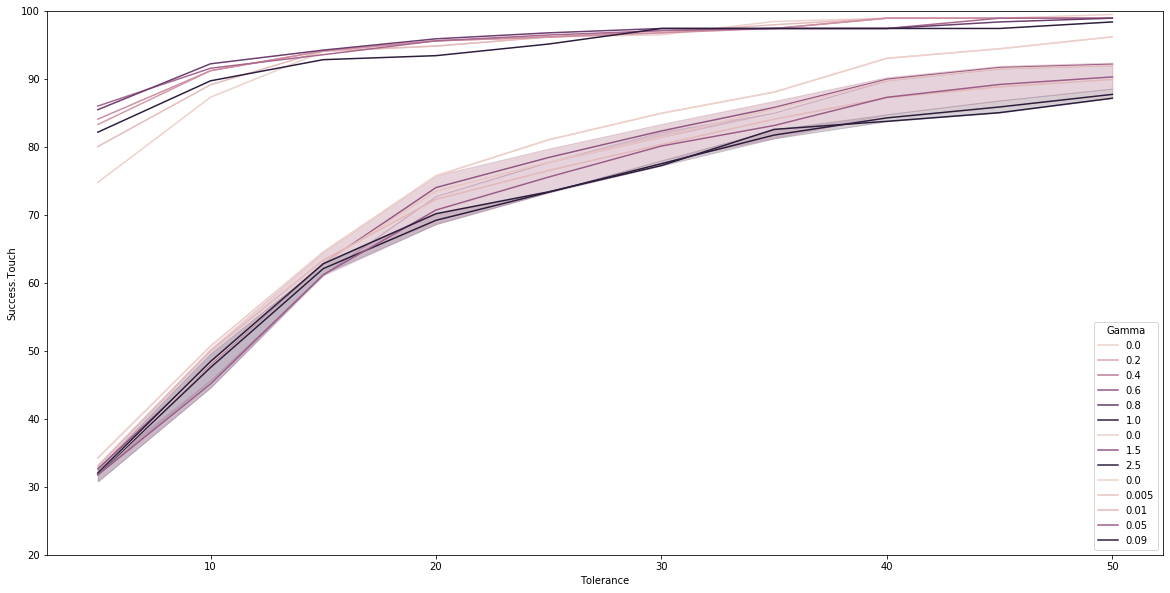

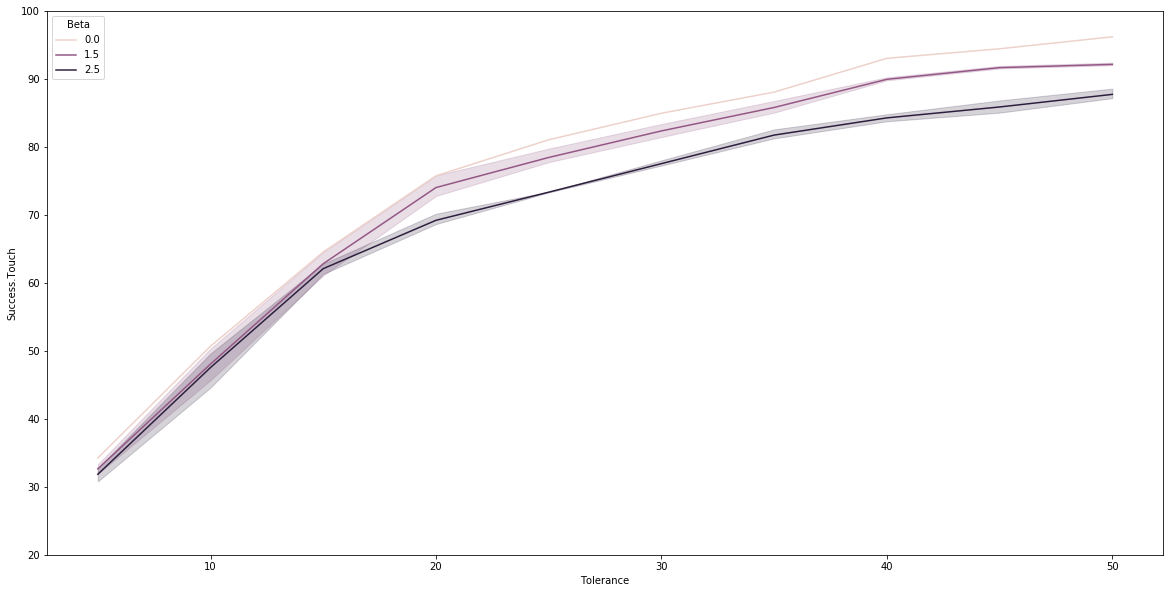

In [286]:
plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Success.Touch', hue = 'Alpha', data = analysisPerTask)
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Success.Touch', hue = 'Beta', data = analysisPerTask)
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Success.Touch', hue = 'Gamma', data = analysisPerTask)

alphaplot.set(ylim = (20,100))

plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Success.Touch', hue = 'Beta', data = analysisPerTask)
alphaplot.set(ylim = (20,100))

[(0, 4)]

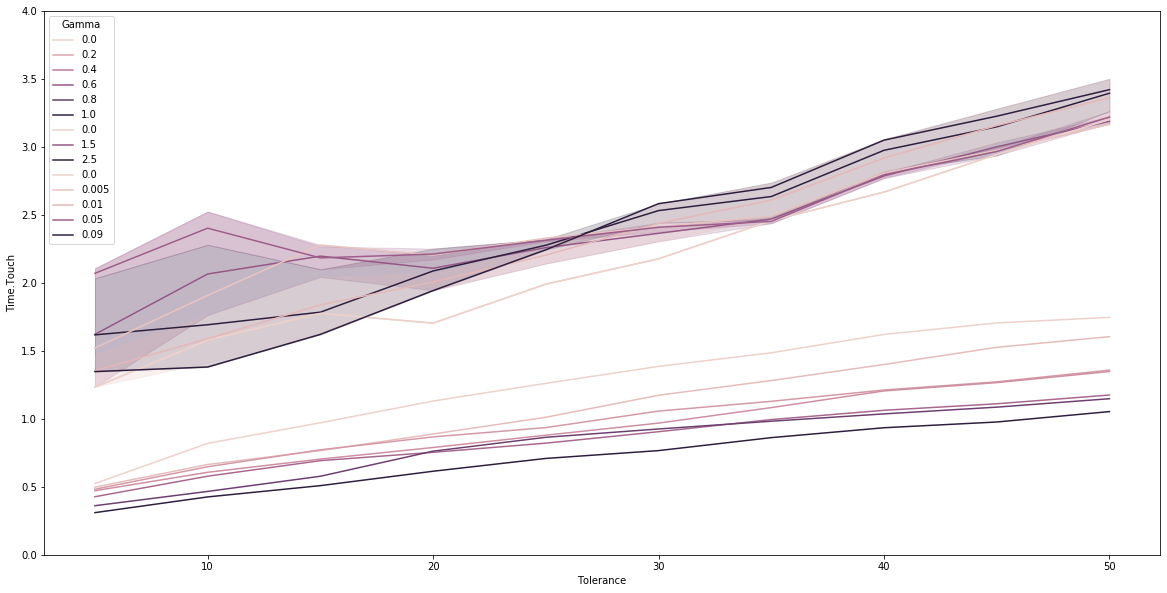

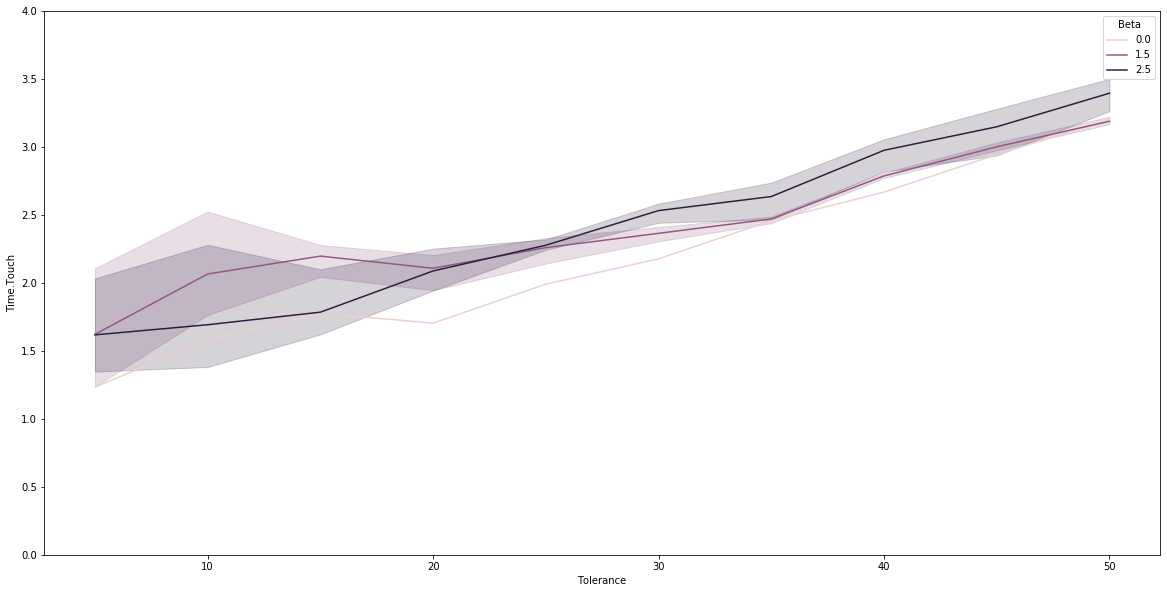

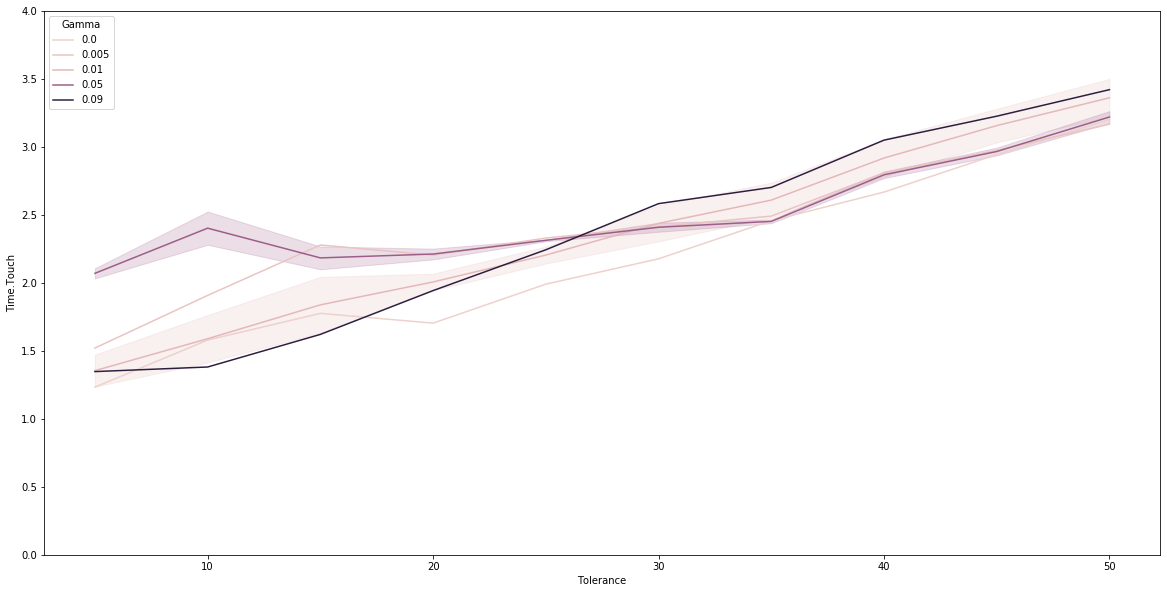

In [285]:
plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Time.Touch', hue = 'Alpha', data = analysisPerTask)
betaplot = sns.lineplot(x = 'Tolerance', y = 'Time.Touch', hue = 'Beta', data = analysisPerTask)
gammaplot = sns.lineplot(x = 'Tolerance', y = 'Time.Touch', hue = 'Gamma', data = analysisPerTask)

alphaplot.set(ylim = (0,4))

plt.figure(figsize=(20,10))
betaplot = sns.lineplot(x = 'Tolerance', y = 'Time.Touch', hue = 'Beta', data = analysisPerTask)
betaplot.set(ylim = (0, 4))

plt.figure(figsize=(20,10))
gammaplot = sns.lineplot(x = 'Tolerance', y = 'Time.Touch', hue = 'Gamma', data = analysisPerTask)
gammaplot.set(ylim = (0, 4))

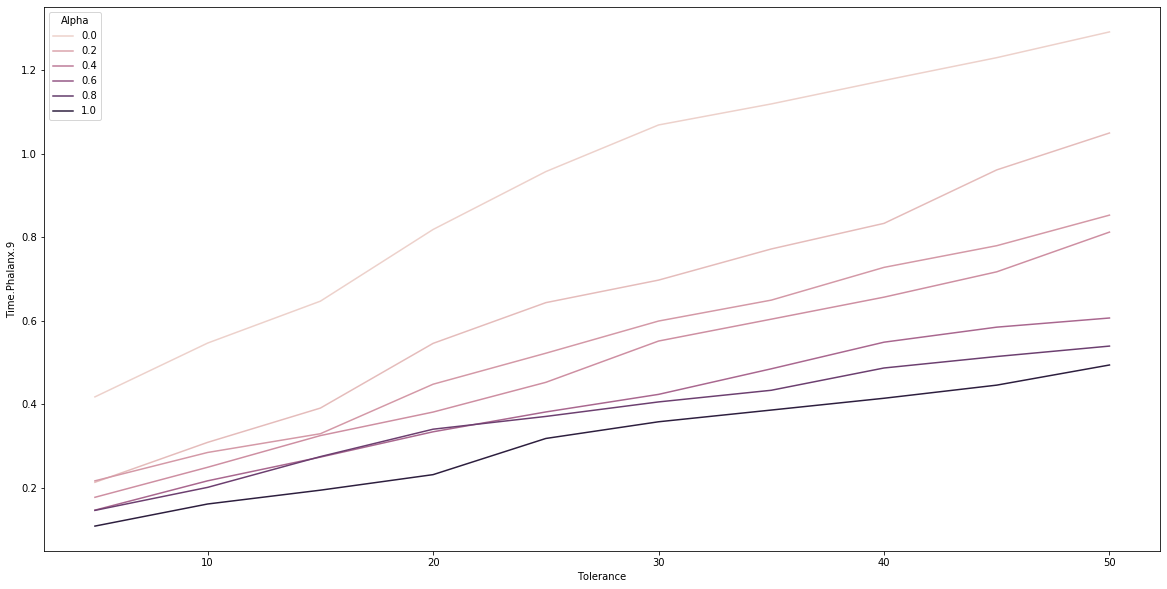

In [255]:
plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Time.Phalanx.9', hue = 'Alpha', data = globalAnalysis)


[(35, 100)]

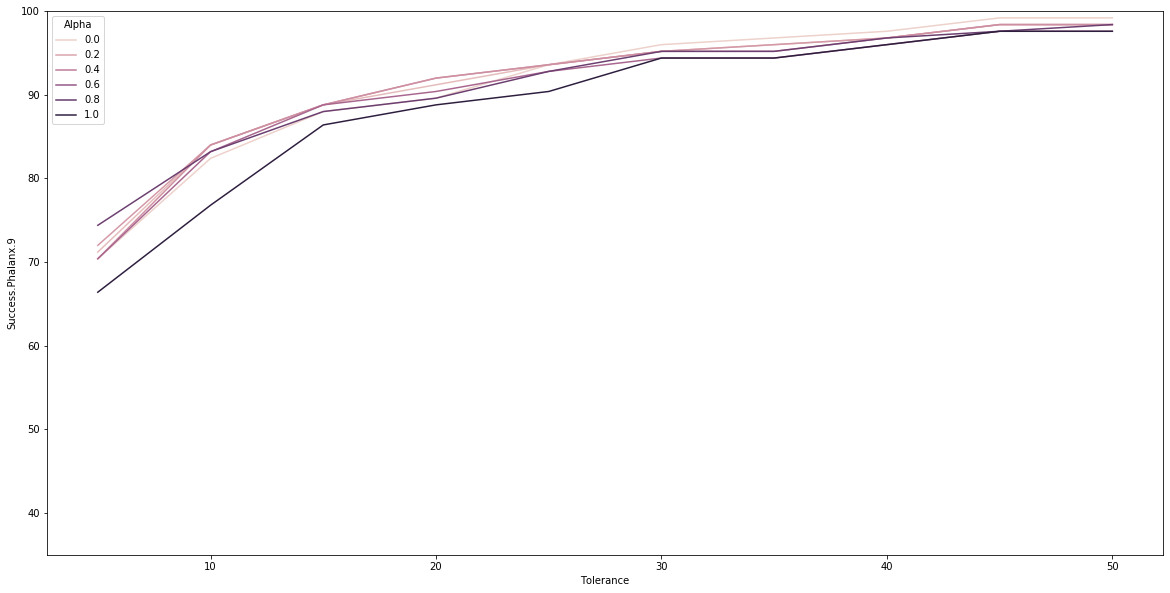

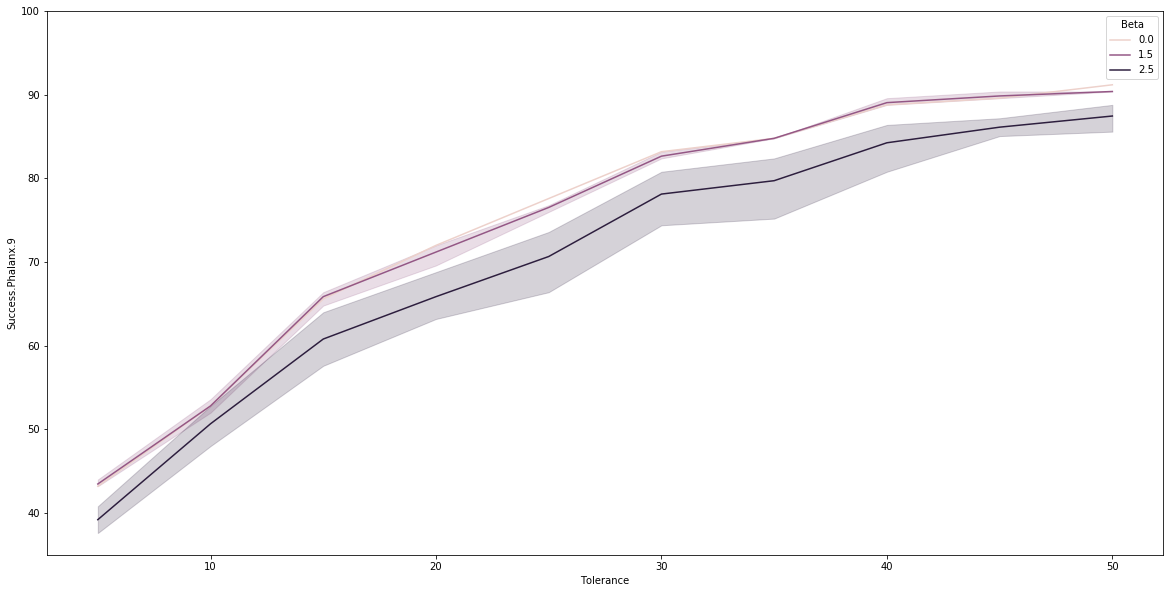

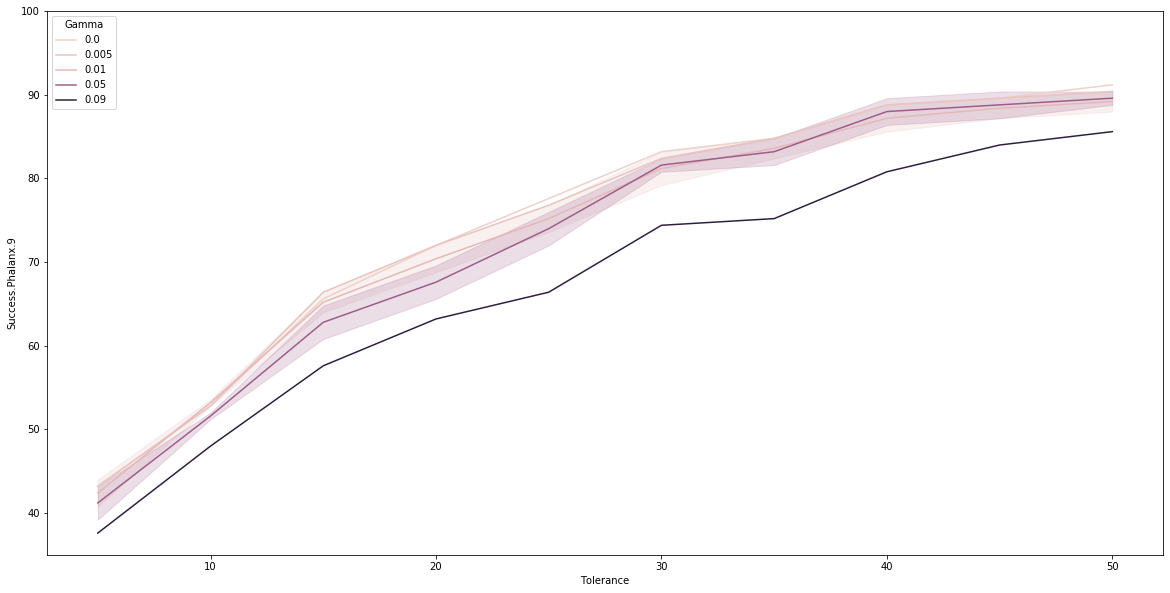

In [256]:
plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Success.Phalanx.9', hue = 'Alpha', data = globalAnalysis)
alphaplot.set(ylim = (35,100))
plt.figure(figsize=(20,10))
betaplot = sns.lineplot(x = 'Tolerance', y = 'Success.Phalanx.9', hue = 'Beta', data = globalAnalysis)
betaplot.set(ylim = (35,100))
plt.figure(figsize=(20,10))
gammaplot = sns.lineplot(x = 'Tolerance', y = 'Success.Phalanx.9', hue = 'Gamma', data = globalAnalysis)
gammaplot.set(ylim = (35,100))


[(0, 1.5)]

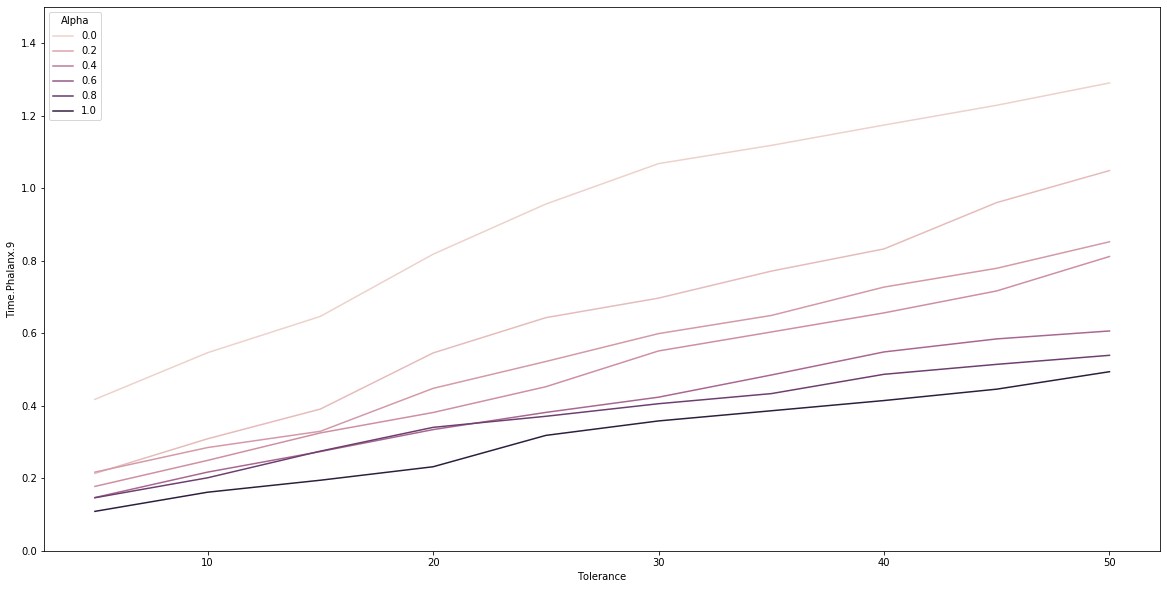

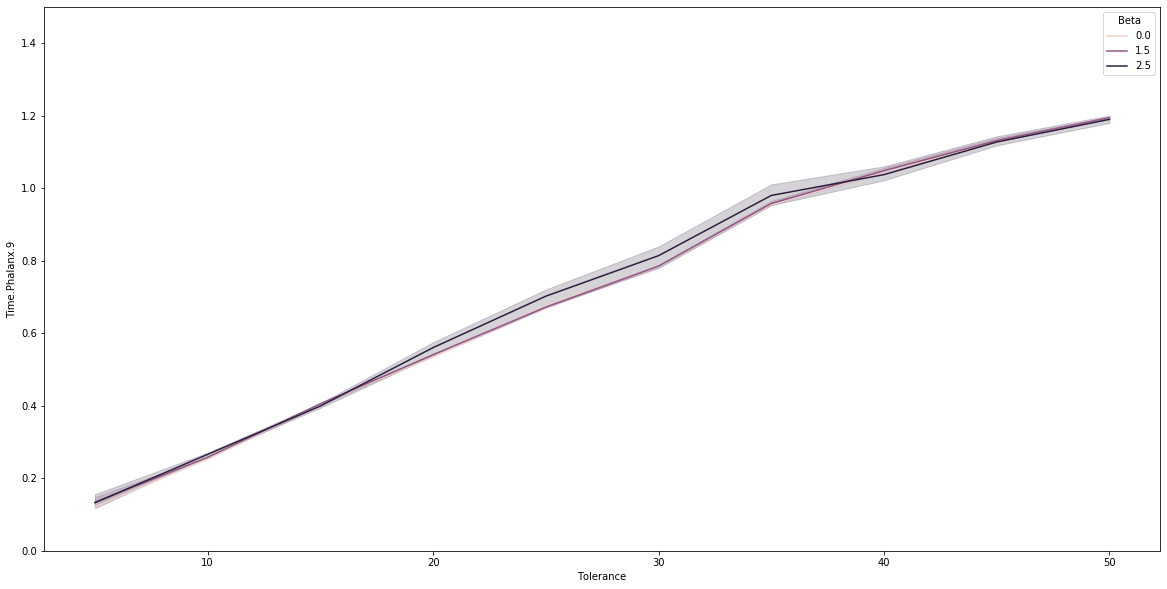

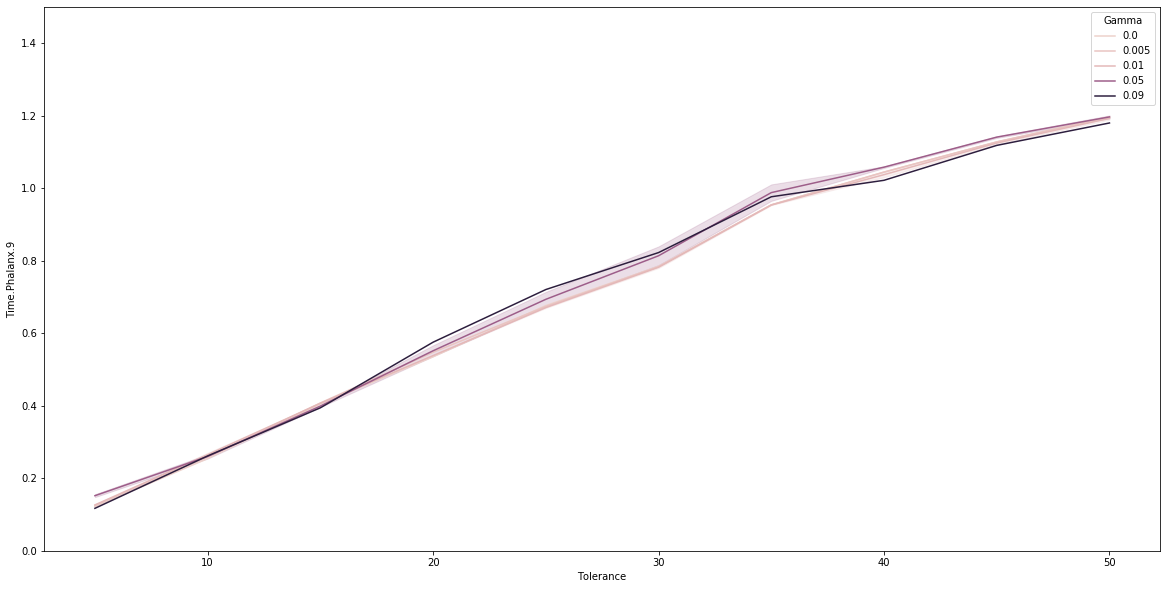

In [257]:
plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Time.Phalanx.9', hue = 'Alpha', data = globalAnalysis)
alphaplot.set(ylim = (0, 1.5))
plt.figure(figsize=(20,10))
betaplot = sns.lineplot(x = 'Tolerance', y = 'Time.Phalanx.9', hue = 'Beta', data = globalAnalysis)
betaplot.set(ylim = (0,1.5))
plt.figure(figsize=(20,10))
gammaplot = sns.lineplot(x = 'Tolerance', y = 'Time.Phalanx.9', hue = 'Gamma', data = globalAnalysis)
gammaplot.set(ylim = (0, 1.5))

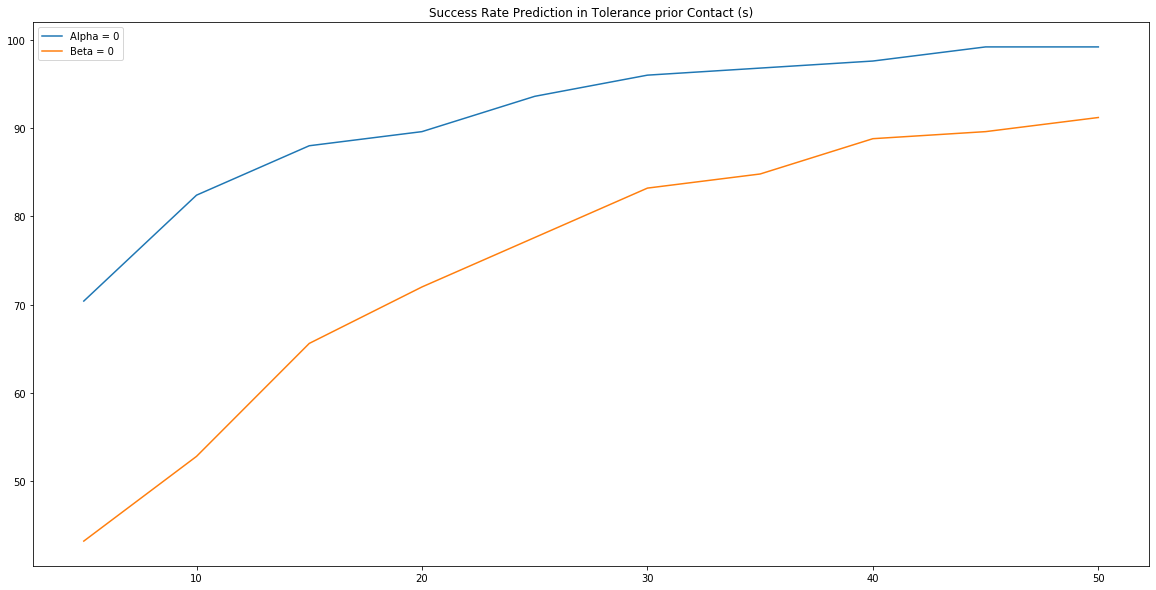

In [258]:
plt.figure(figsize=(20,10))
cond1 = globalAnalysis['Alpha'] == 0
cond0 = globalAnalysis['Beta'] == 0
#plt.plot(globalAnalysis[globalAnalysis['Alpha'] == 1]['Tolerance'], globalAnalysis[globalAnalysis['Alpha'] == 1]['Success.Phalanx.9'], label = 'Alpha 1')
plt.plot(globalAnalysis[cond1]['Tolerance'], globalAnalysis[cond1]['Success.Phalanx.9'], label = 'Alpha = 0')
plt.plot(globalAnalysis[cond0]['Tolerance'], globalAnalysis[cond0]['Success.Phalanx.9'], label = 'Beta = 0')

plt.title('Success Rate Prediction in Tolerance prior Contact (s)')

plt.ylim = (0, 100)
plt.legend()

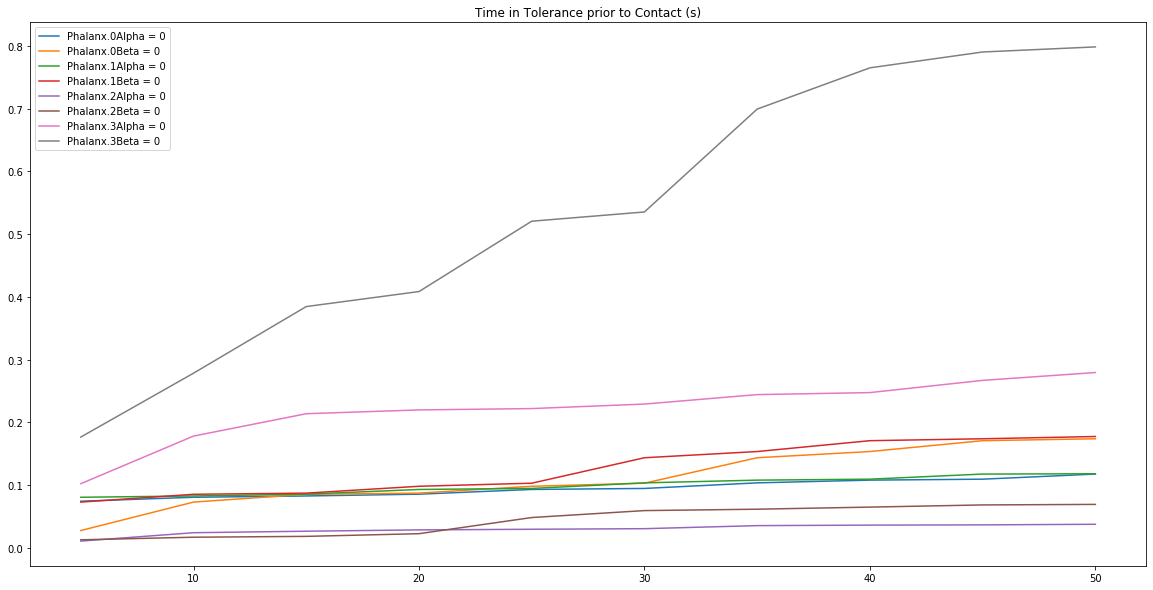

In [263]:
plt.figure(figsize=(20,10))

for i in range(0, 4):
    
    cond1 = globalAnalysis['Alpha'] == 0
    cond0 = globalAnalysis['Beta'] == 0
    #plt.plot(globalAnalysis[globalAnalysis['Alpha'] == 1]['Tolerance'], globalAnalysis[globalAnalysis['Alpha'] == 1]['Success.Phalanx.9'], label = 'Alpha 1')
    plt.plot(globalAnalysis[cond1]['Tolerance'], globalAnalysis[cond1]['Time.Phalanx.'+str(i)], label = 'Phalanx.' + str(i) + 'Alpha = 0')
    plt.plot(globalAnalysis[cond0]['Tolerance'], globalAnalysis[cond0]['Time.Phalanx.'+str(i)], label = 'Phalanx.' + str(i) + 'Beta = 0')

plt.title('Time in Tolerance prior to Contact (s)')
plt.ylim = (0, 100)
plt.legend()

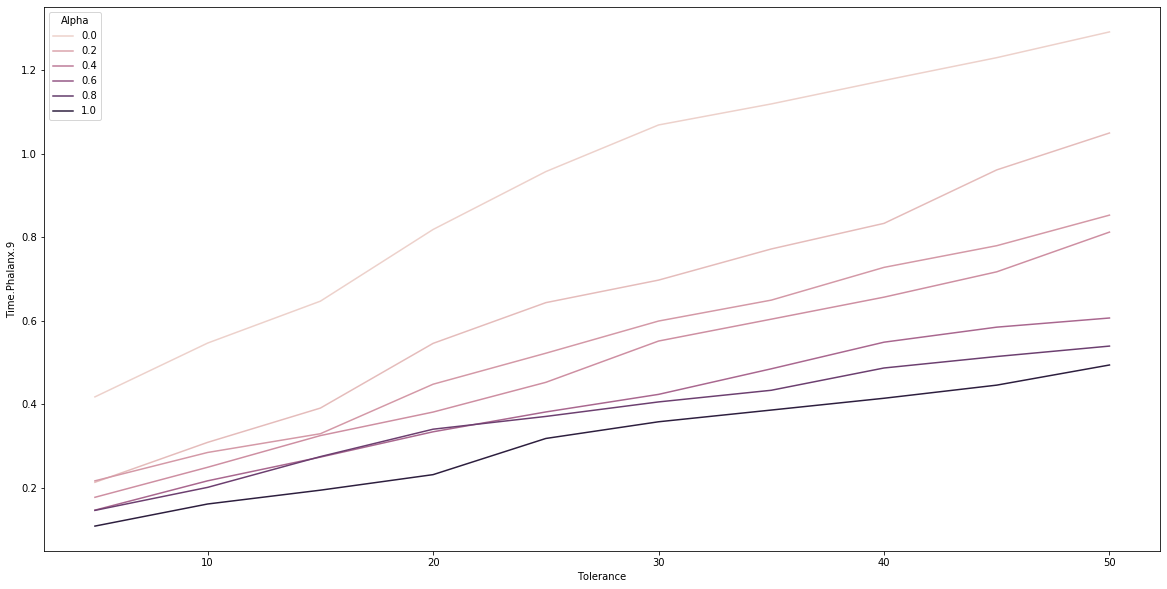

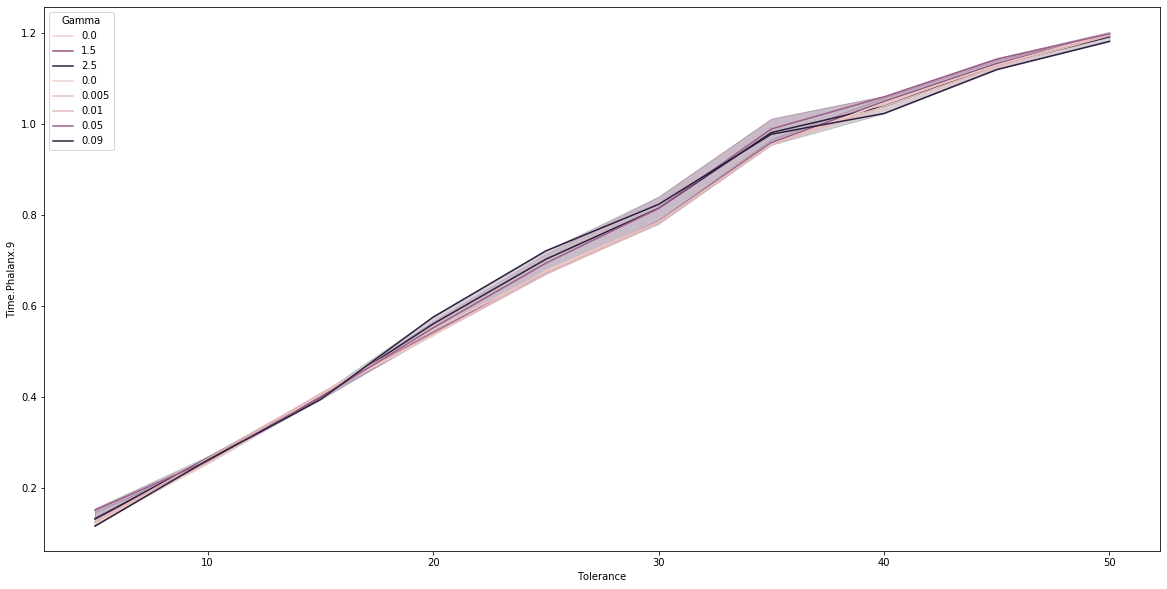

In [260]:
plt.figure(figsize=(20,10))
sns.lineplot(x = 'Tolerance', y = 'Time.Phalanx.9', hue = 'Alpha', data = globalAnalysis)

plt.figure(figsize=(20,10))

sns.lineplot(x = 'Tolerance', y = 'Time.Phalanx.9', hue = 'Beta', data = globalAnalysis)
sns.lineplot(x = 'Tolerance', y = 'Time.Phalanx.9', hue = 'Gamma', data = globalAnalysis)